In [50]:
# Librería para instalar y leer archivos rds
#! pip install pyreadr

In [51]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

plt.rcParams["figure.figsize"] = (10,8)


In [52]:
df = pd.read_csv("Datos/bikes.csv", index_col = 0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [55]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
df_categoricas = df[["dteday", "season", "holiday", "workingday", "weekday", "mnth", "weathersit"]]
df_categoricas

,dteday,season,holiday,workingday,weekday,mnth,weathersit
0,01-01-2018,spring,0,0,6,1,2
1,02-01-2018,spring,0,0,0,1,2
2,03-01-2018,spring,0,1,1,1,1
3,04-01-2018,spring,0,1,2,1,1
4,05-01-2018,spring,0,1,3,1,1
...,...,...,...,...,...,...,...
725,27-12-2019,spring,0,1,4,12,2
726,28-12-2019,spring,0,1,5,12,2
727,29-12-2019,spring,0,0,6,12,2
728,30-12-2019,spring,0,0,0,12,1


In [58]:
df = df.astype({ 'yr':'category',"holiday":'category',"workingday":'category', "weekday":'category', "mnth":'category', "weathersit":'category'})

In [59]:
df.dtypes

instant          int64
dteday          object
season          object
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [60]:
# vamos a renombrar nuestras columnas
df.rename(columns={'yr':'year', 'mnth':'month', 'atemp':'sensacion_termica', 'cnt':'count_bikes'}, inplace=True)

In [61]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'sensacion_termica', 'hum',
       'windspeed', 'casual', 'registered', 'count_bikes'],
      dtype='object')

In [62]:
#Chicas guardadlo en un jupyter es oro!(1)
dicc = {'variable':[], 'valores_unicos':[], 'frecuencias':[]} 

for col in df_categoricas.columns: 
    dicc['variable'].append(col) 
    dicc['valores_unicos'].append(list(df_categoricas[col].value_counts().index)) 
    dicc['frecuencias'].append(list(df_categoricas[col].value_counts().values)) 

In [63]:
#Chicas guardadlo en un jupyter es oro!(2)
df_uniques = pd.DataFrame(dicc) 
df_uniques 

,variable,valores_unicos,frecuencias
0,dteday,"[01-01-2018, 25-04-2019, 27-04-2019, 28-04-201...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,season,"[autumn, summer, spring, winter]","[188, 184, 180, 178]"
2,holiday,"[0, 1]","[709, 21]"
3,workingday,"[1, 0]","[499, 231]"
4,weekday,"[6, 0, 1, 2, 4, 5, 3]","[105, 105, 105, 104, 104, 104, 103]"
5,mnth,"[1, 3, 5, 7, 8, 10, 12, 4, 6, 9, 11, 2]","[62, 62, 62, 62, 62, 62, 62, 60, 60, 60, 60, 56]"
6,weathersit,"[1, 2, 3]","[463, 246, 21]"


##### Las ideas de análisis que tenemos hasta ahora son:
* Anticipar a las bicis que pueden hacer falta según condiciones climáticas, festivos u otros eventos (aún por recopilar)

    - Diferenciar el uso entre usuarios casuales y registrados
    
* Mirar datos sobre atascos, para recomendar el uso de bicis en según qué zonas
* Geolocalizar estos atascos para ver de dónde provienen y hacer un recomendador de estaciones de bicicleta

In [64]:
# Nos vamos a centrar en analizar el df original para establecer cuales variables afectana nuetra canitdad ed bicicletas

In [65]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188
year,730,2,0,365
month,730,12,1,62
holiday,730,2,0,709
weekday,730,7,0,105
workingday,730,2,1,499
weathersit,730,3,1,463


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
sensacion_termica,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
count_bikes,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


Vemos que hay variacion entre meses y por lo tanto habra variacion entre estaciones, tenemos que limpiar la columna

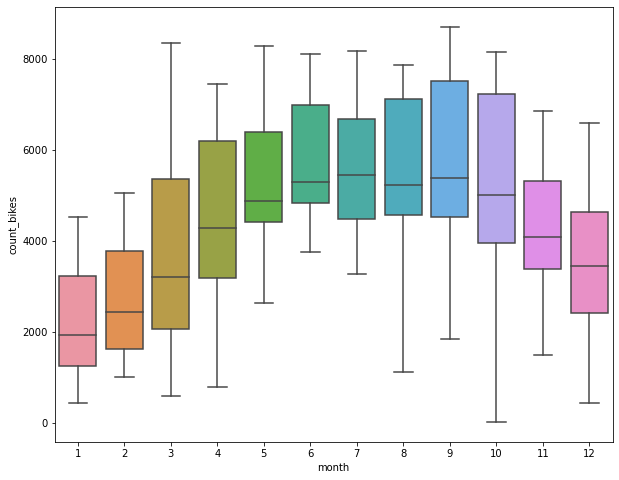

In [67]:
sns.boxplot(x='month', y='count_bikes', data=df);

Cambiamos el tipo de dato de la columna "dteday" y la convertimos a "datetime" para poder usarla para la limpieza de la columna season

In [68]:
df['dteday'] = df['dteday'].astype('datetime64')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            730 non-null    int64         
 1   dteday             730 non-null    datetime64[ns]
 2   season             730 non-null    object        
 3   year               730 non-null    category      
 4   month              730 non-null    category      
 5   holiday            730 non-null    category      
 6   weekday            730 non-null    category      
 7   workingday         730 non-null    category      
 8   weathersit         730 non-null    category      
 9   temp               730 non-null    float64       
 10  sensacion_termica  730 non-null    float64       
 11  hum                730 non-null    float64       
 12  windspeed          730 non-null    float64       
 13  casual             730 non-null    int64         
 14  registered

In [70]:
# prueba, por si sirve el razonamiento
def limpiar_season(x):
    if 2018-12-21 <= df['dteday'] <= 2018-3-20 or 2019-12-21 <= df['dteday'] <= 2019-3-20:
        x = 'winter'
    elif 2018-3-21 <= df['dteday'] <= 2018-6-20 or 2019-3-21 <= df['dteday'] <= 2019-6-20:
        x = 'spring'
    elif 2018-6-21 <= df['dteday'] <= 2018-9-20 or 2019-6-21 <= df['dteday'] <= 2019-9-20:
        x = 'summer'
    elif 2018-9-21 <= df['dteday'] <= 2018-12-20 or 2019-9-21 <= df['dteday'] <= 2019-12-20:
        x = 'fall'
    else:
        x= np.nan

In [71]:
dt.datetime(2020, 5, 17)

datetime.datetime(2020, 5, 17, 0, 0)

Probamos diferentes funciones para cambiar los valores de la columna "season"

In [72]:
#estaba con esto por ultimo, no sé como comparar mayores y menores en fechas
def limpiar_season(x):
    if dt.datetime(2018, 12, 21) <= df['dteday'] <= dt.datetime(2018, 3, 20) or dt.datetime(2019, 12, 21) <= df['dteday'] <= dt.datetime(2019, 3, 20):
        x = 'winter'
    elif dt.datetime(2018, 3, 21) <= df['dteday'] <= dt.datetime(2018, 6, 20) or dt.datetime(2019, 3, 21) <= df['dteday'] <= dt.datetime(2019, 6, 20):
        x = 'spring'
    elif dt.datetime(2018, 6, 21) <= df['dteday'] <= dt.datetime(2018, 9, 20) or dt.datetime(2019, 6, 21) <= df['dteday'] <= dt.datetime(2019, 9, 20):
        x = 'summer'
    elif dt.datetime(2018, 9, 21) <= df['dteday'] <= dt.datetime(2018, 12, 20) or dt.datetime(2019, 9, 21) <= df['dteday'] <= dt.datetime(2019, 12, 20):
        x = 'fall'
    else:
        x= np.nan

In [73]:
df.head(2)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,sensacion_termica,hum,windspeed,casual,registered,count_bikes
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [74]:
#df['season']= df['season'].apply(limpiar_season)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [75]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'



In [76]:
# Assuming df has a date column of type `datetime`
df['season'] = df['dteday'].map(season_of_date)

In [77]:
df.sample(10)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,sensacion_termica,hum,windspeed,casual,registered,count_bikes
423,424,2019-02-28,winter,1,2,0,2,1,1,14.725847,17.67625,39.5833,12.958939,229,4134,4363
134,135,2018-05-15,spring,0,5,0,0,0,2,23.062500,26.80000,86.7083,10.249593,1582,2971,4553
230,231,2018-08-19,summer,0,8,0,5,1,2,28.085000,31.66105,72.2917,9.333636,797,3356,4153
91,92,2018-02-04,winter,0,4,0,6,0,2,12.915000,15.78185,65.3750,13.208782,898,1354,2252
177,178,2018-06-27,summer,0,6,0,1,1,2,27.982500,31.85020,65.8333,7.208396,854,3854,4708
668,669,2019-10-31,autumn,1,10,0,3,1,2,14.657500,18.05500,66.6667,11.166689,419,5147,5566
243,244,2018-01-09,winter,0,9,0,4,1,1,26.855000,30.74605,63.9167,9.500332,783,4332,5115
178,179,2018-06-28,summer,0,6,0,2,1,1,30.510847,34.62790,63.4167,9.666961,732,3916,4648
80,81,2018-03-22,spring,0,3,0,2,1,1,18.108347,22.03210,62.4583,15.125250,460,2243,2703
501,502,2019-05-17,spring,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142,7384


/home/adalaber/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


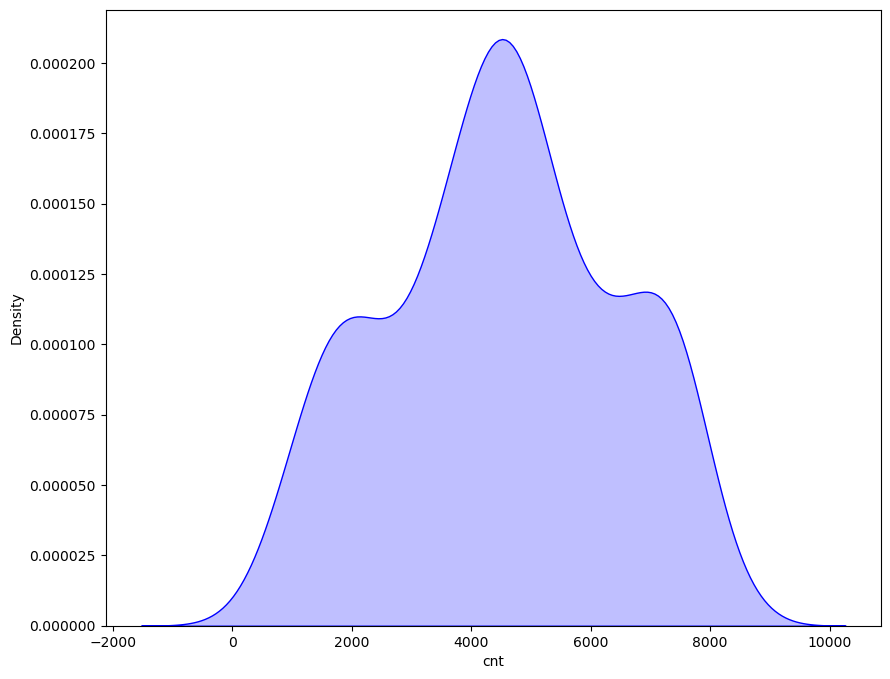

In [ ]:
# Vamos a ver visualmente como está distribuida la variable respuesta

sns.distplot(
df['cnt'], # variable respuesta
hist = False, 
color = "blue", 
kde_kws = {"shade": True, "linewidth": 1}); 

In [ ]:
df_categoricas = df_categoricas.drop('dteday', axis=1)
df_categoricas.shape

KeyError: "['dteday'] not found in axis"

In [ ]:
df_categoricas.shape

(730, 6)

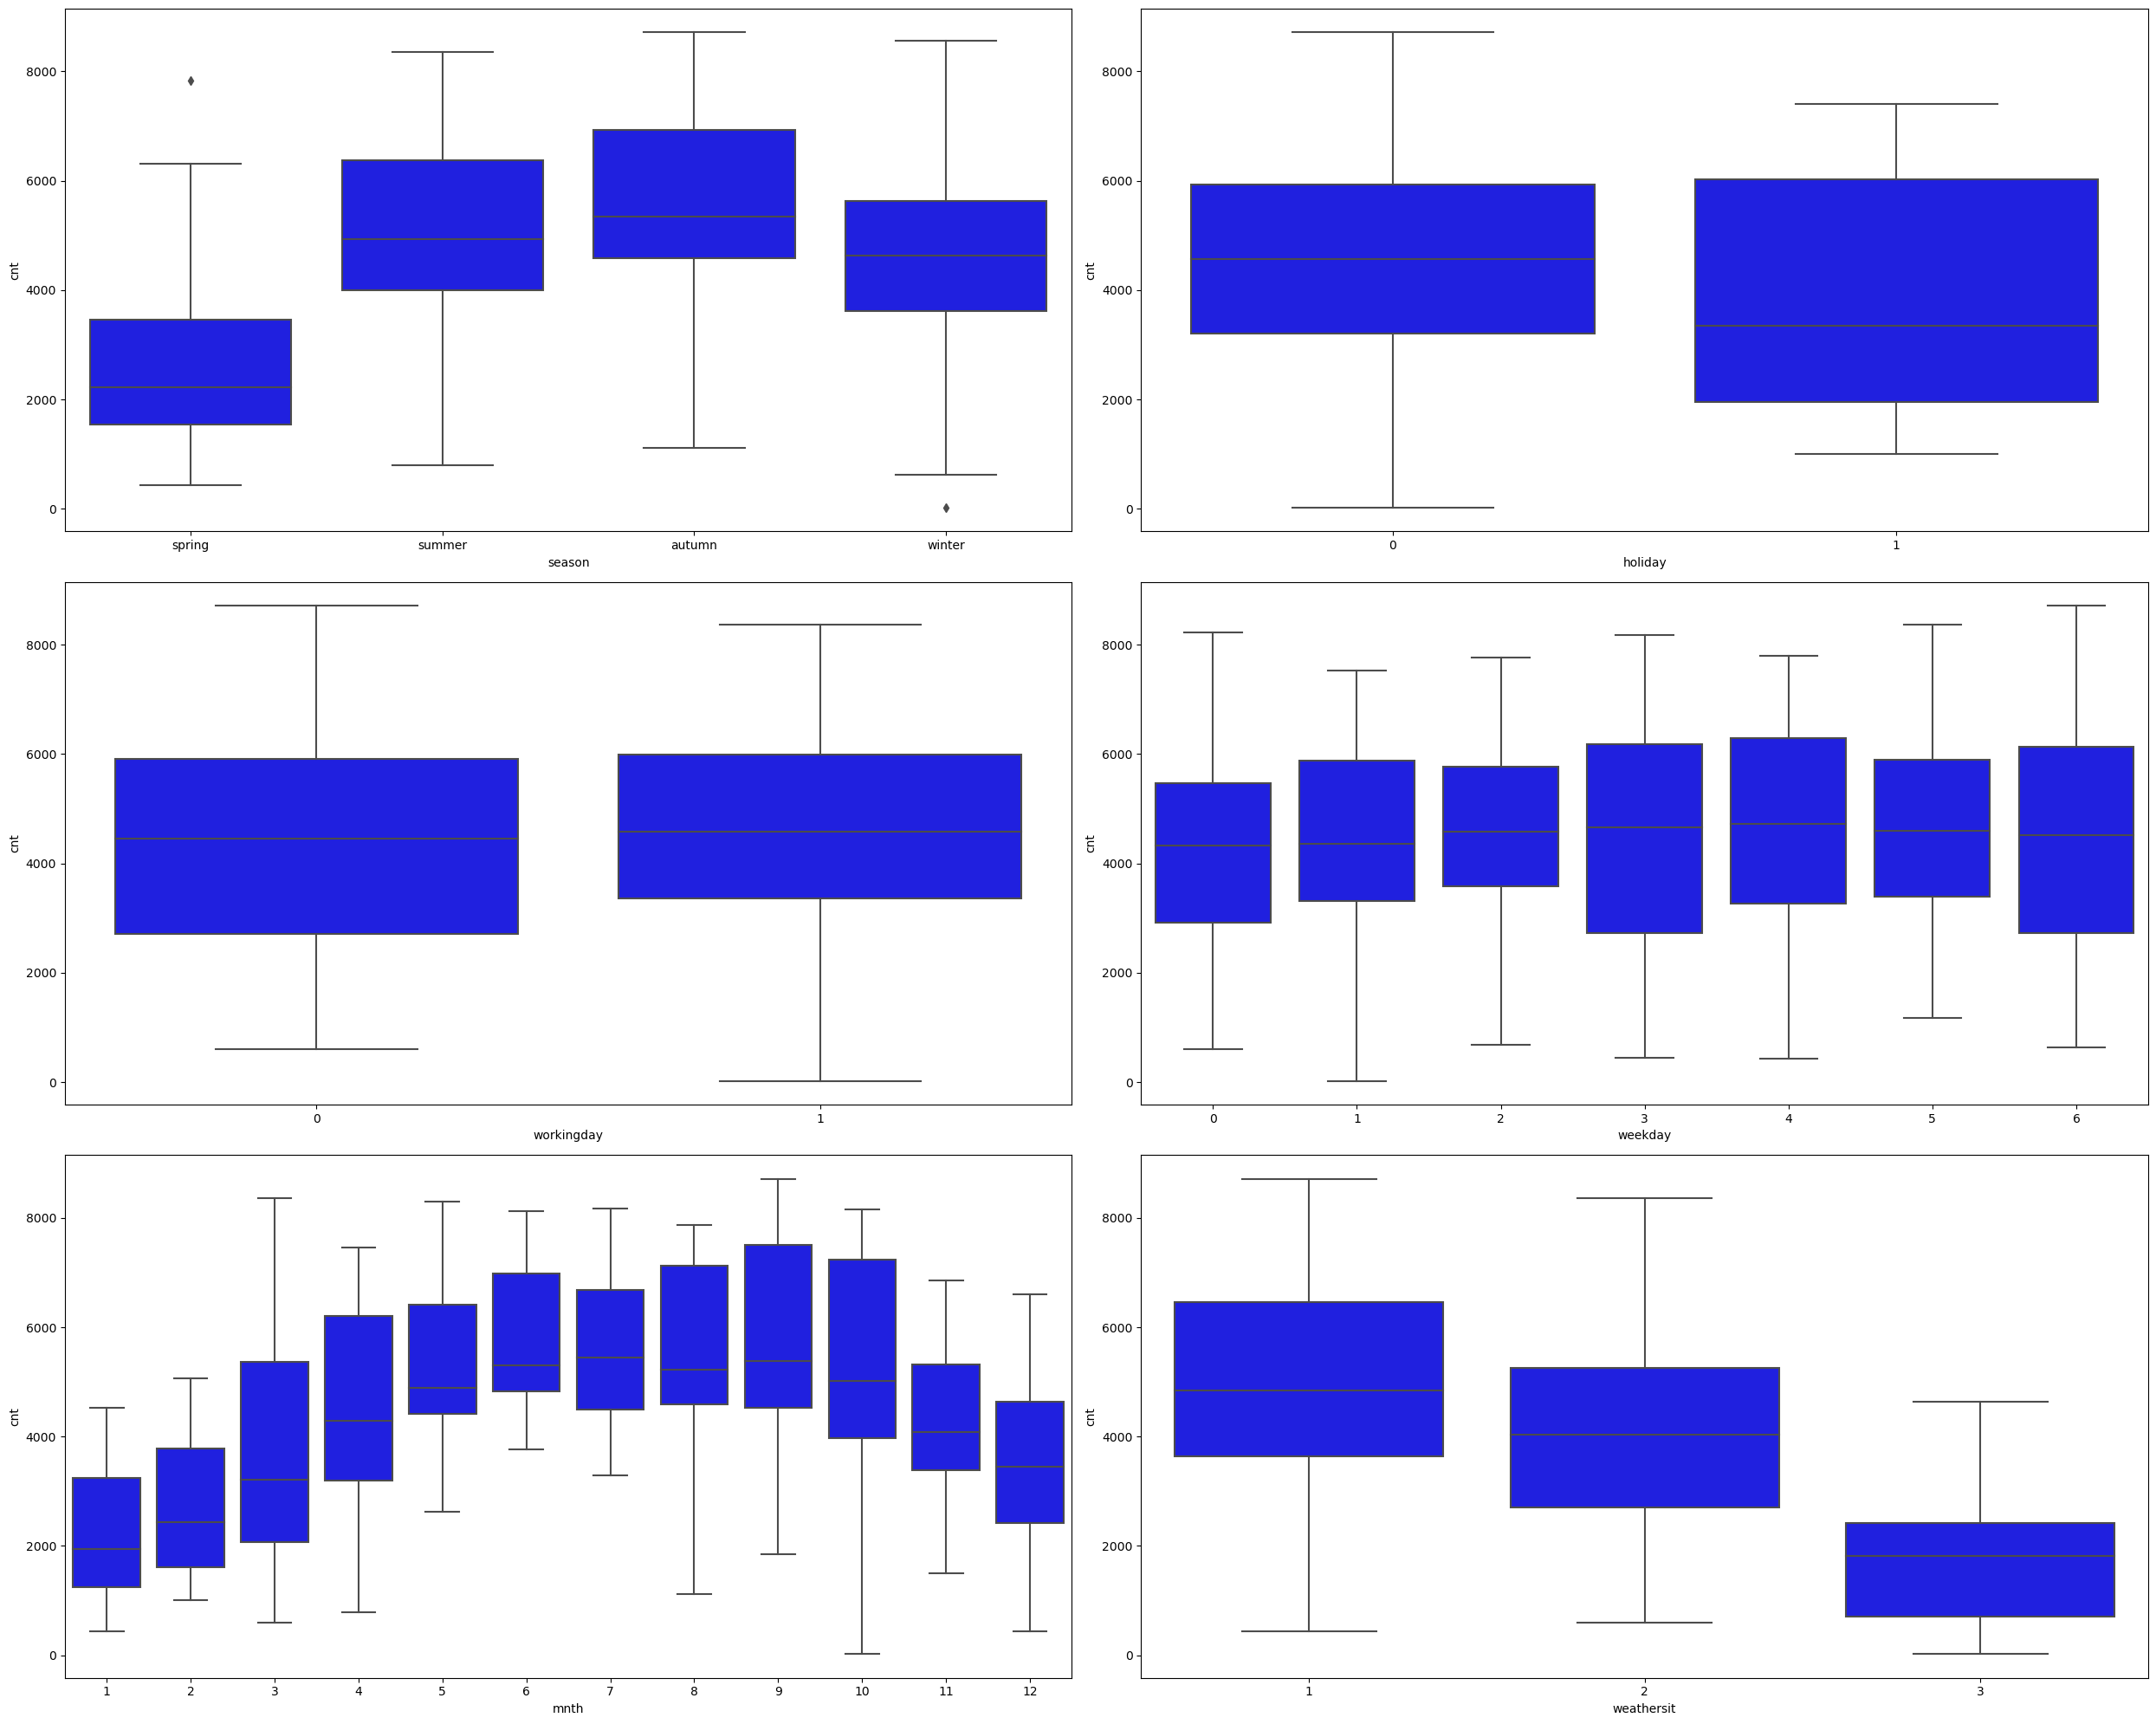

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(25,20))

axes = axes.flat

columnas = df_categoricas.columns

for indice, columna in enumerate(columnas):
    sns.boxplot(x = df_categoricas[columna], y = df['cnt'], data = df, ax=axes[indice], color = "blue"); # para trazar una línea de densidad


plt.tight_layout()

plt.show() 

In [ ]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,winter,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,winter,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


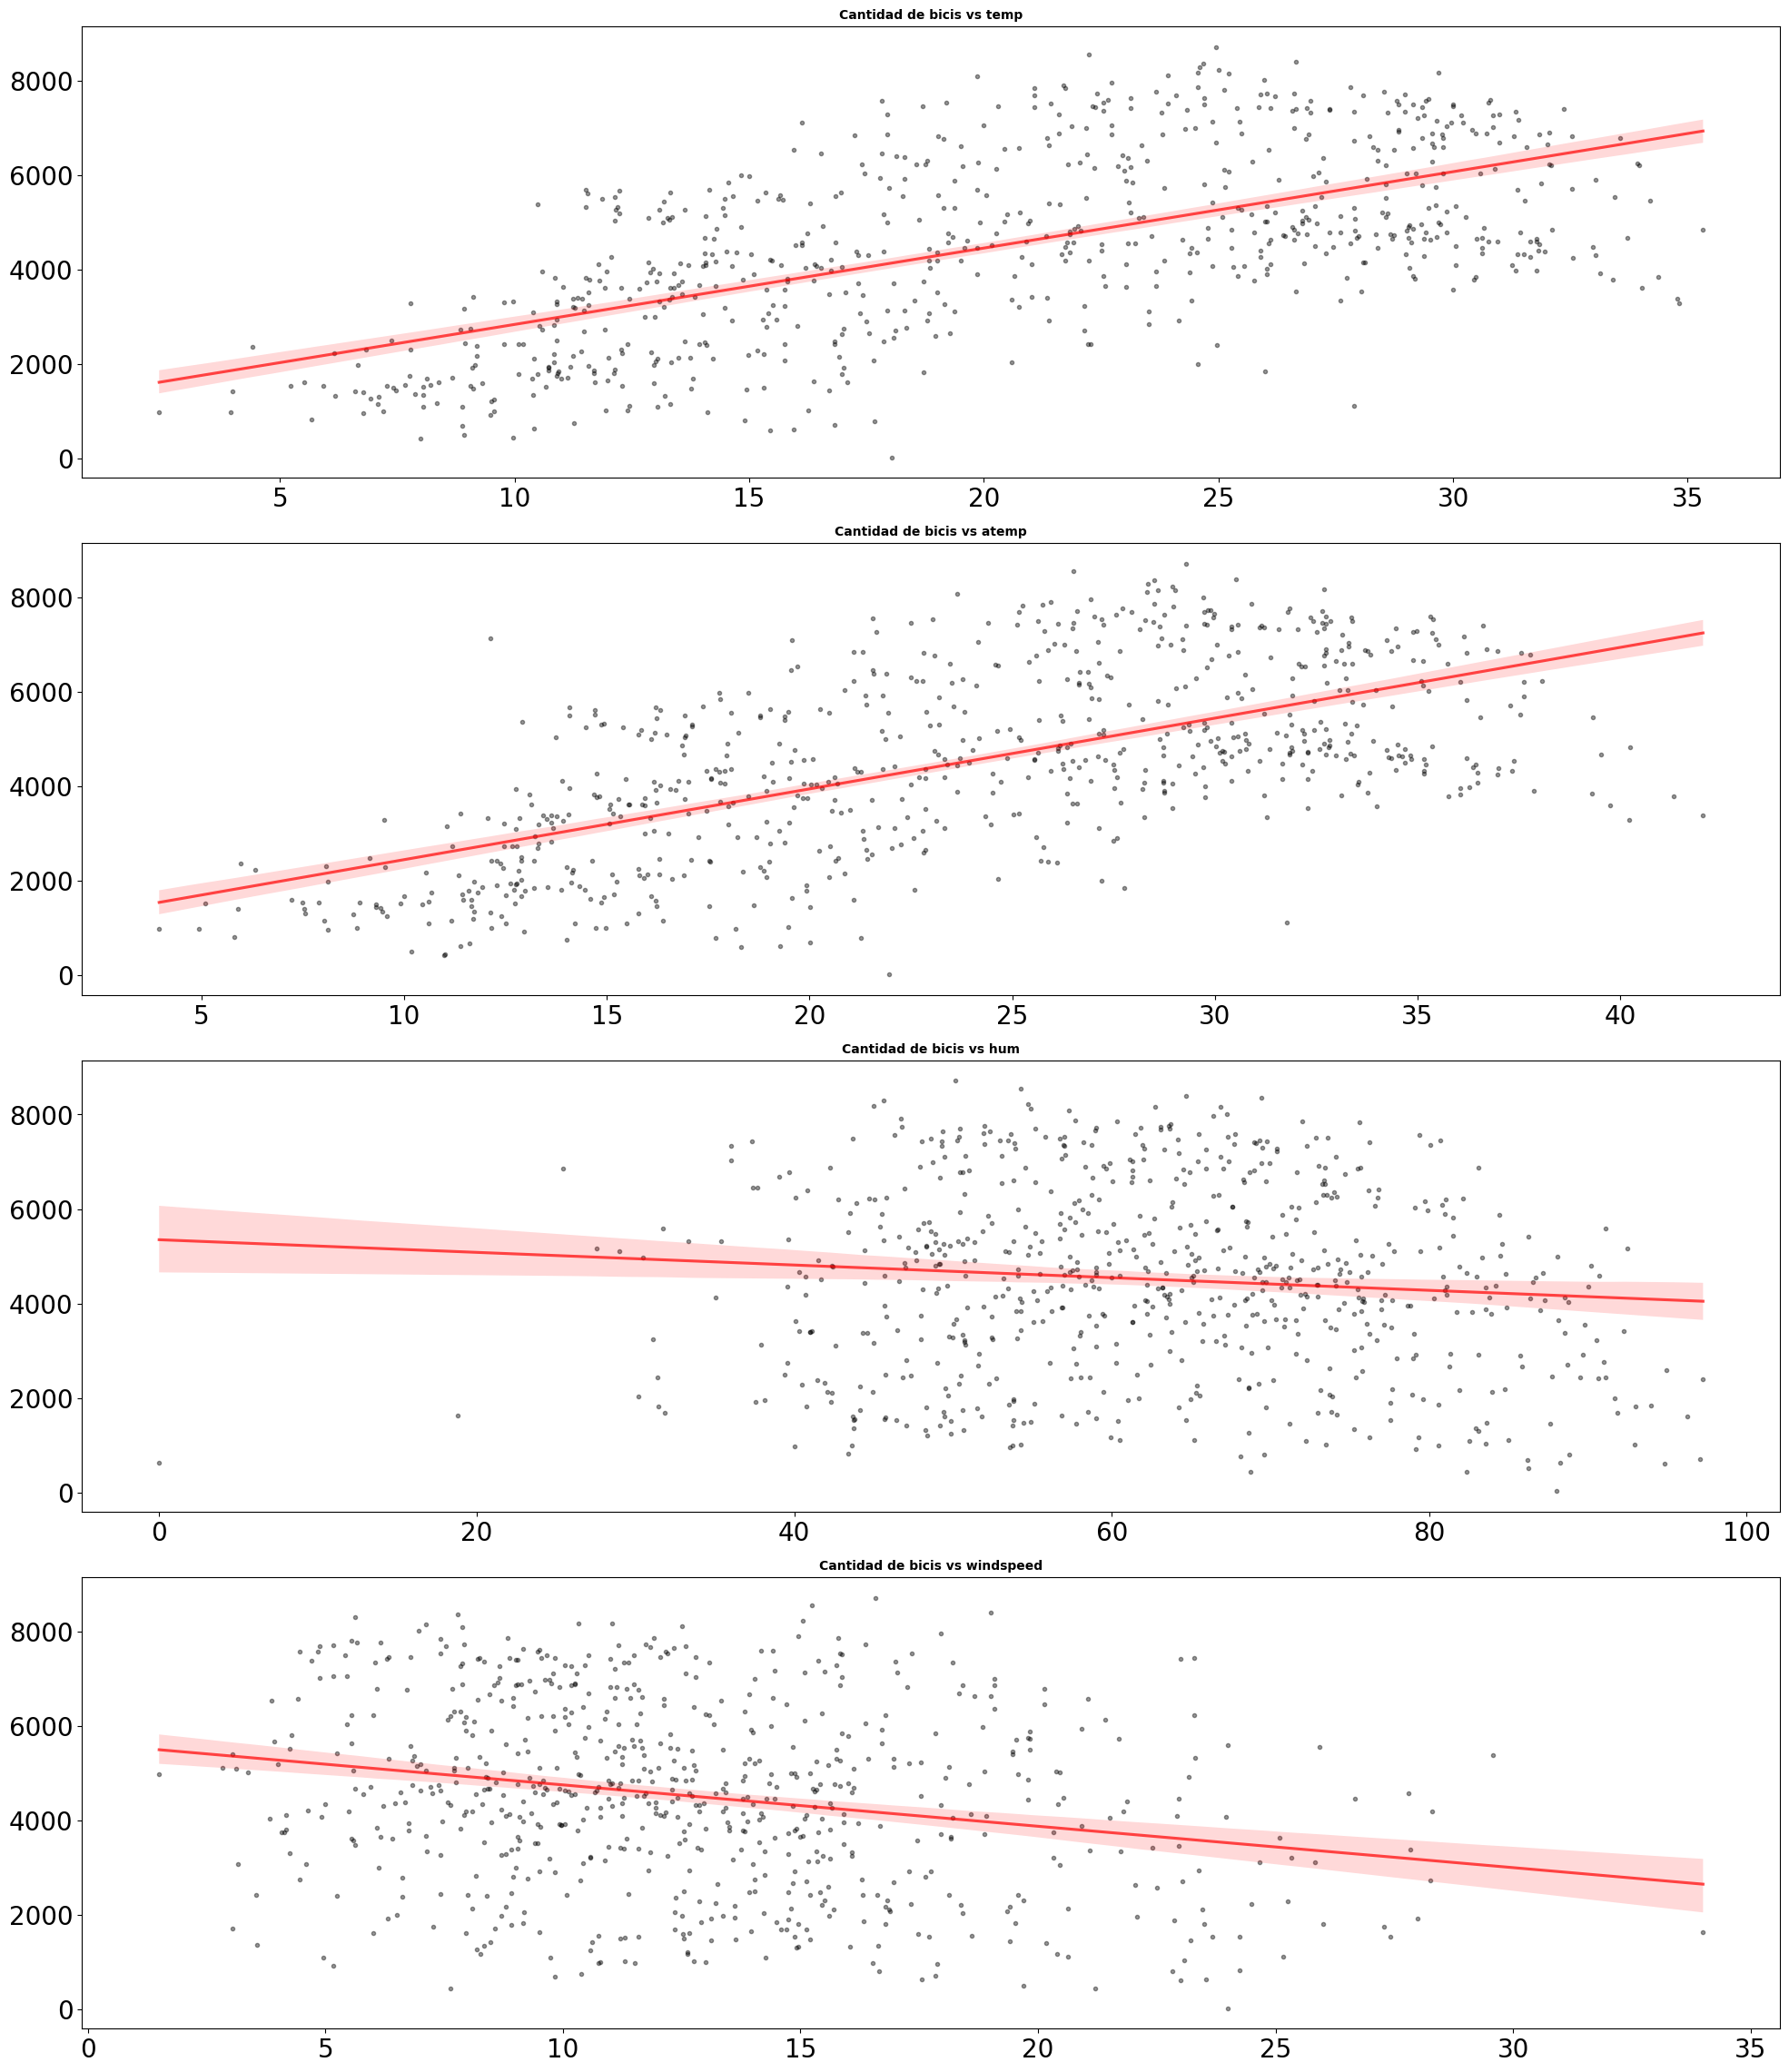

In [ ]:
# Gráfico de relación entre variables predictoras y la variable a predecir. 
# ==============================================================================


fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (20, 40))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("cnt")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["cnt"], 
        color = "black", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Cantidad de bicis vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[0]);

Queremos ver la diferencia de uso entre usuarios casuales y registrados

In [ ]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,sensacion_termica,hum,windspeed,casual,registered,count_bikes
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


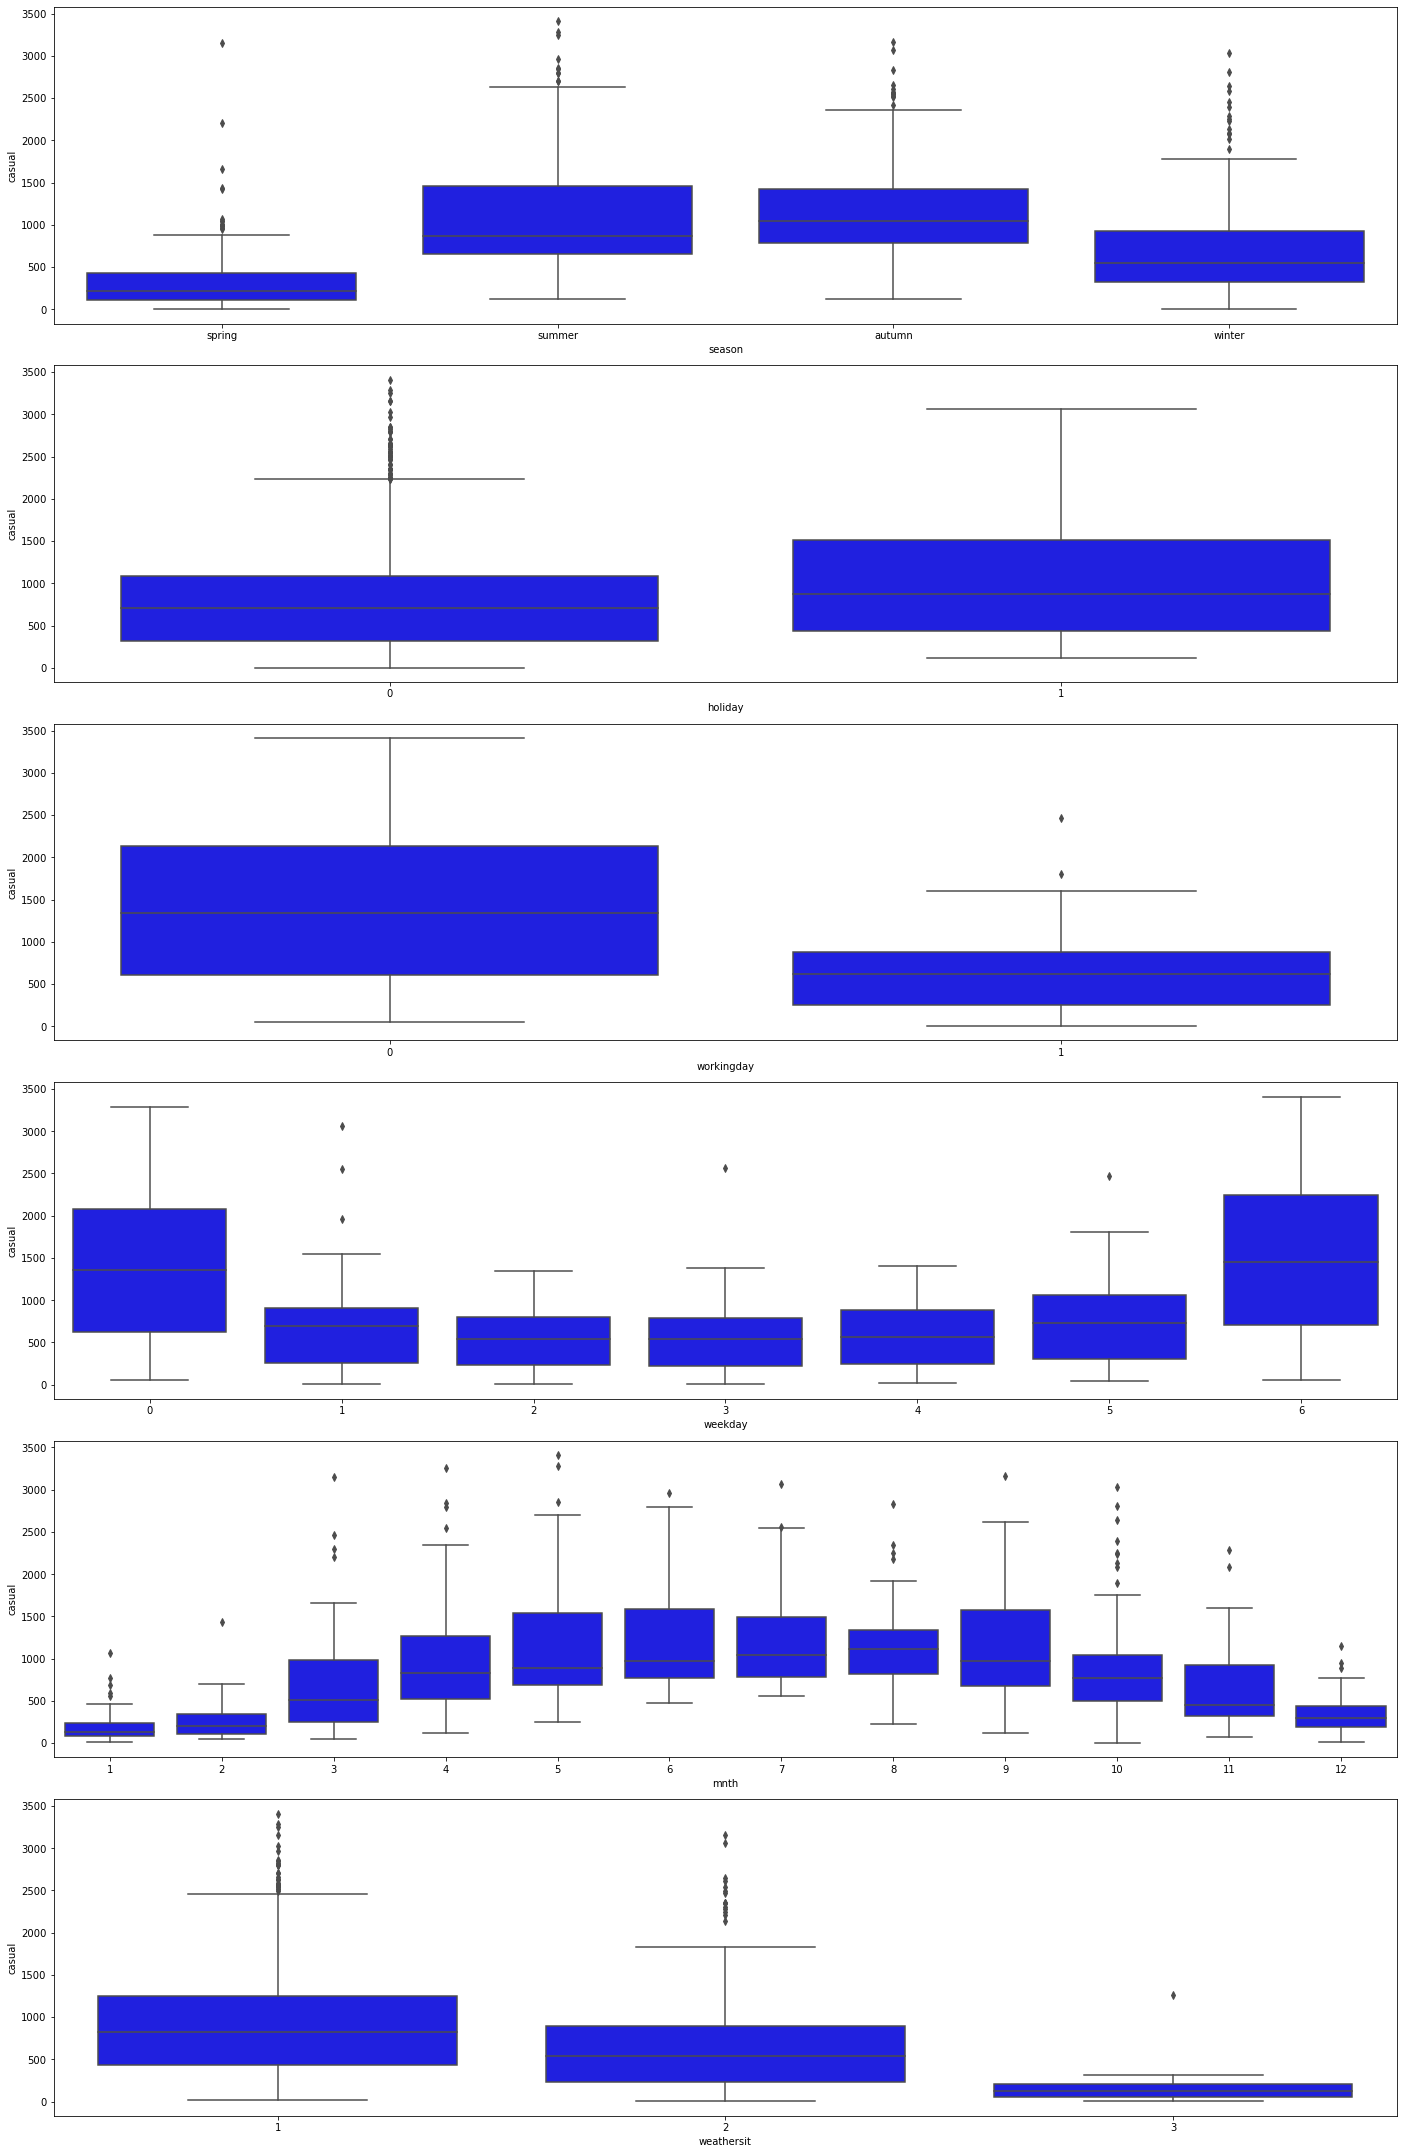

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(20,35))

axes = axes.flat

columnas = df_categoricas.columns

for indice, columna in enumerate(columnas):
    sns.boxplot(x = df_categoricas[columna], y = df['casual'], data = df, ax=axes[indice], color = "blue"); # para trazar una línea de densidad


plt.tight_layout()
plt.delaxes(axes[0])

plt.show() 

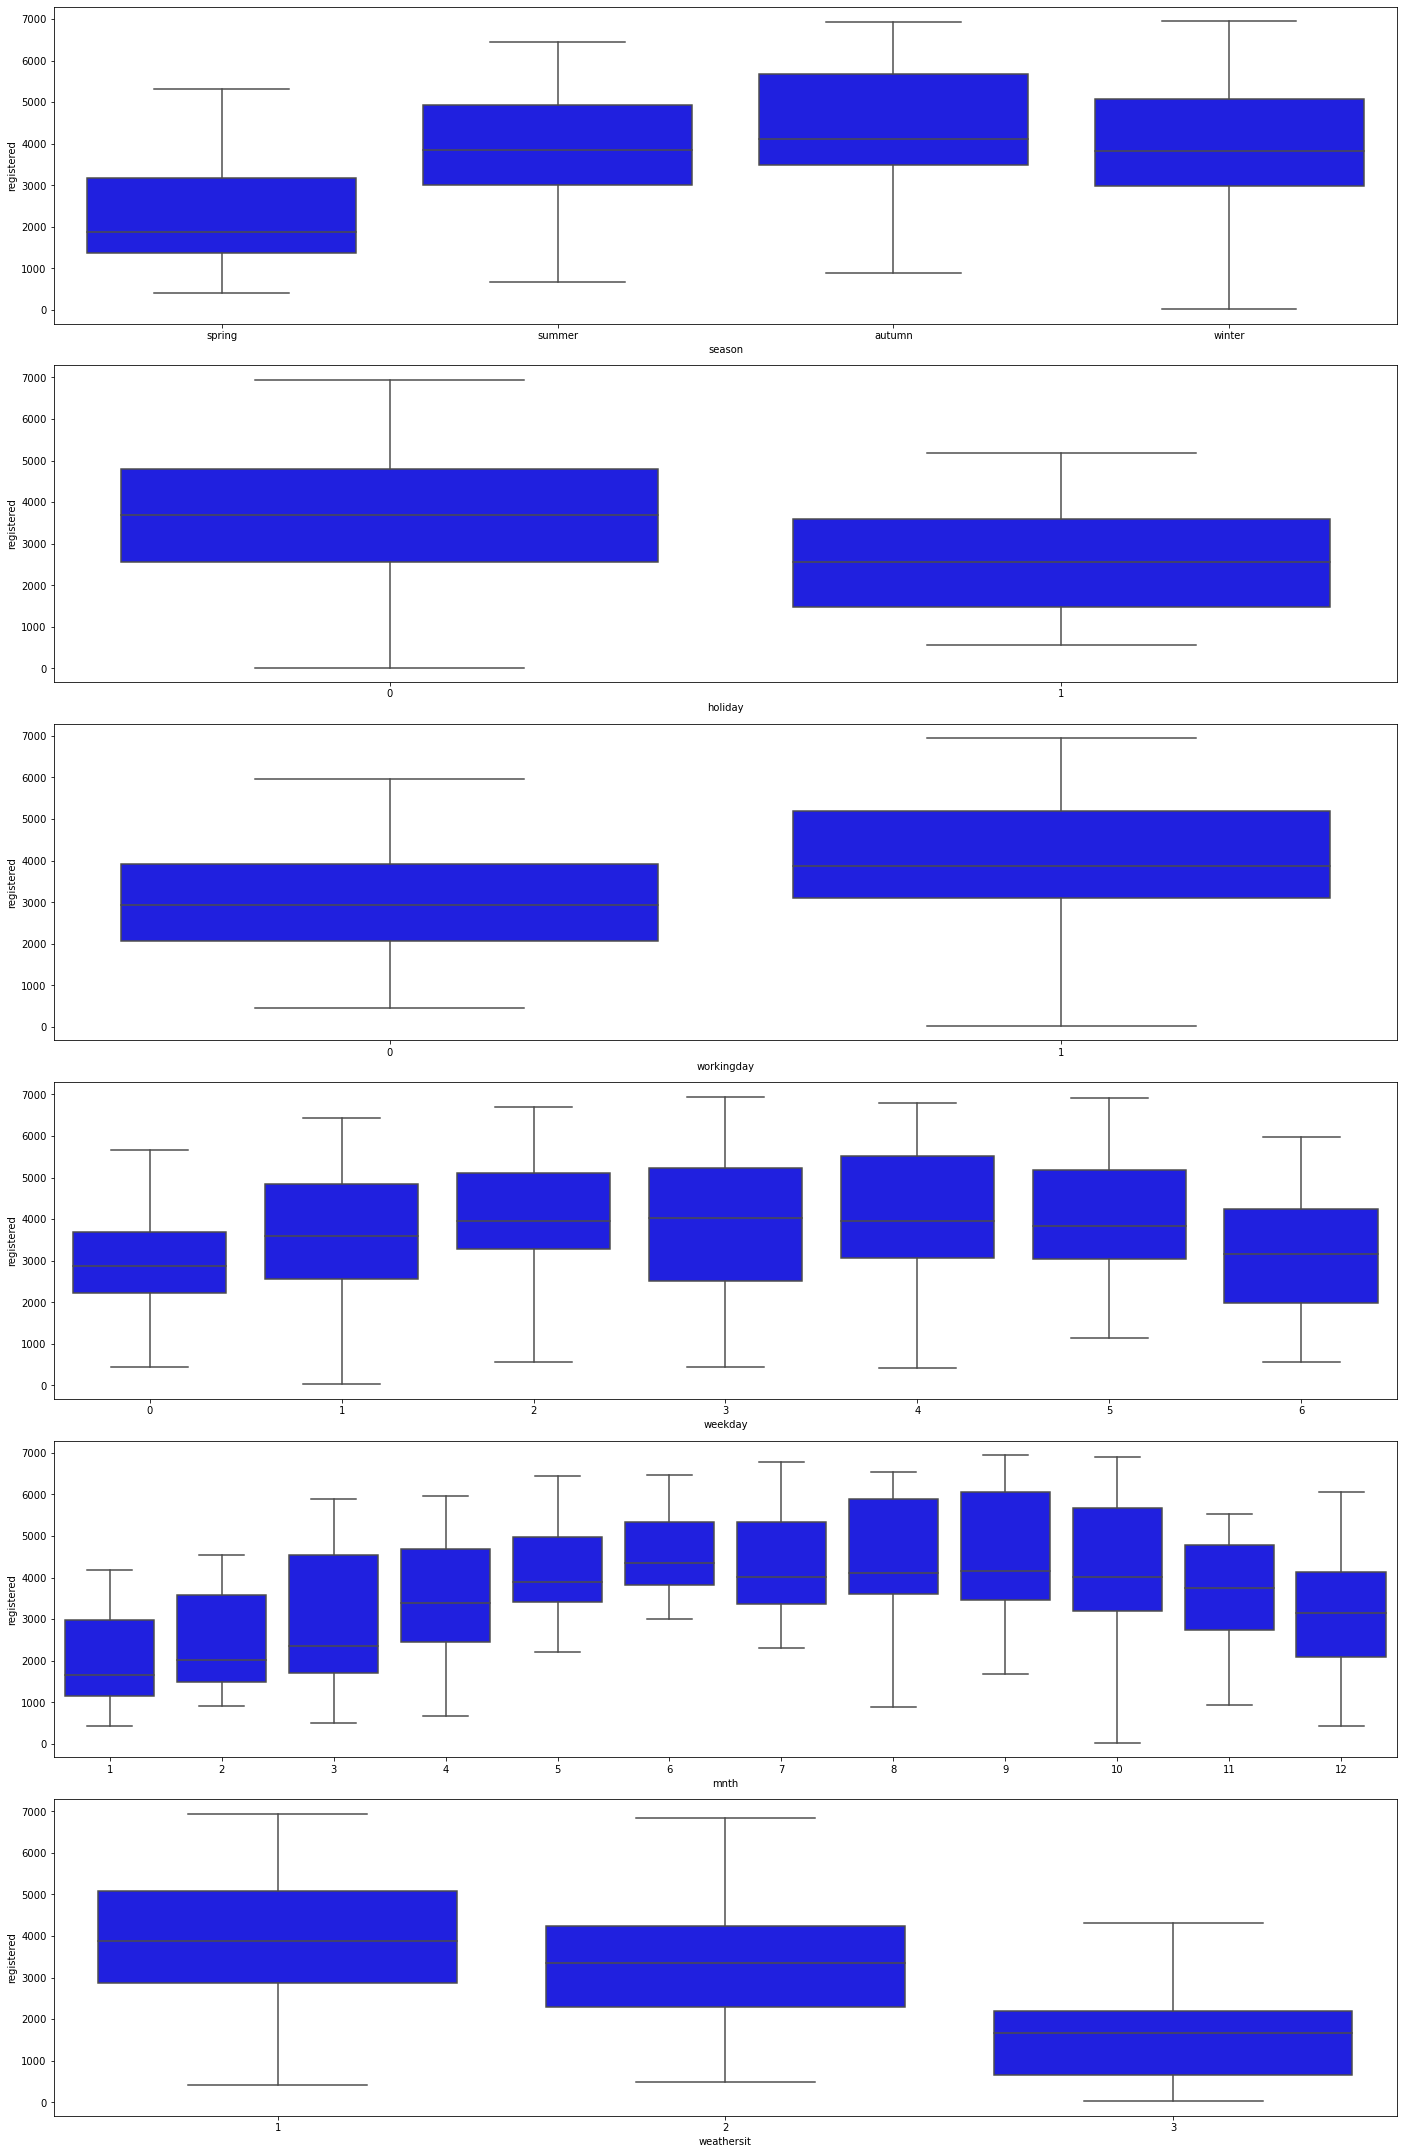

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(20,35))

axes = axes.flat

columnas = df_categoricas.columns

for indice, columna in enumerate(columnas):
    sns.boxplot(x = df_categoricas[columna], y = df['registered'], data = df, ax=axes[indice], color = "blue"); # para trazar una línea de densidad


plt.tight_layout()
plt.delaxes(axes[0])

plt.show() 

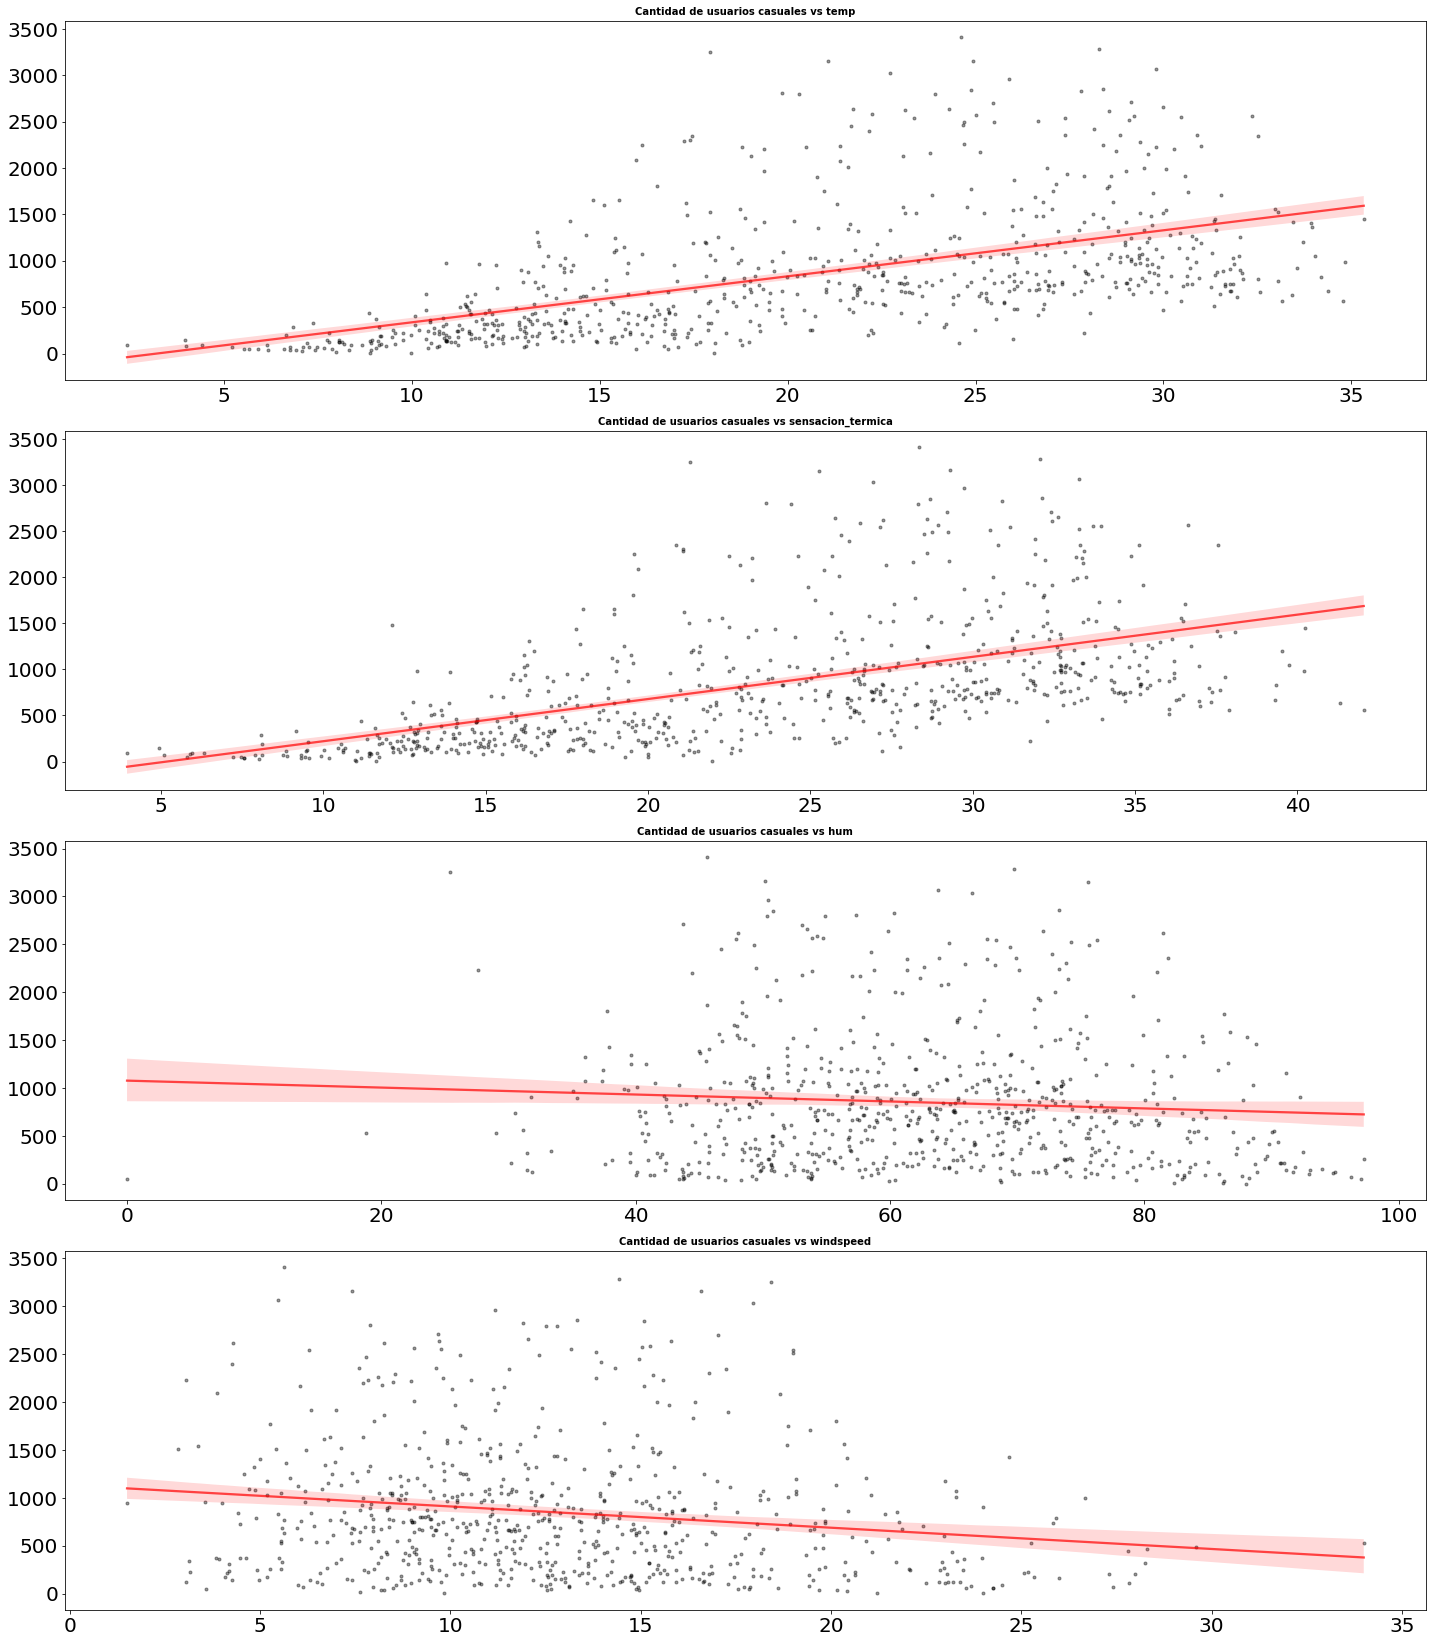

In [ ]:
# Gráfico de relación entre variables predictoras y la variable a predecir. 
# ==============================================================================


fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (20, 40))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("casual")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["casual"], 
        color = "black", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Cantidad de usuarios casuales vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[0]);

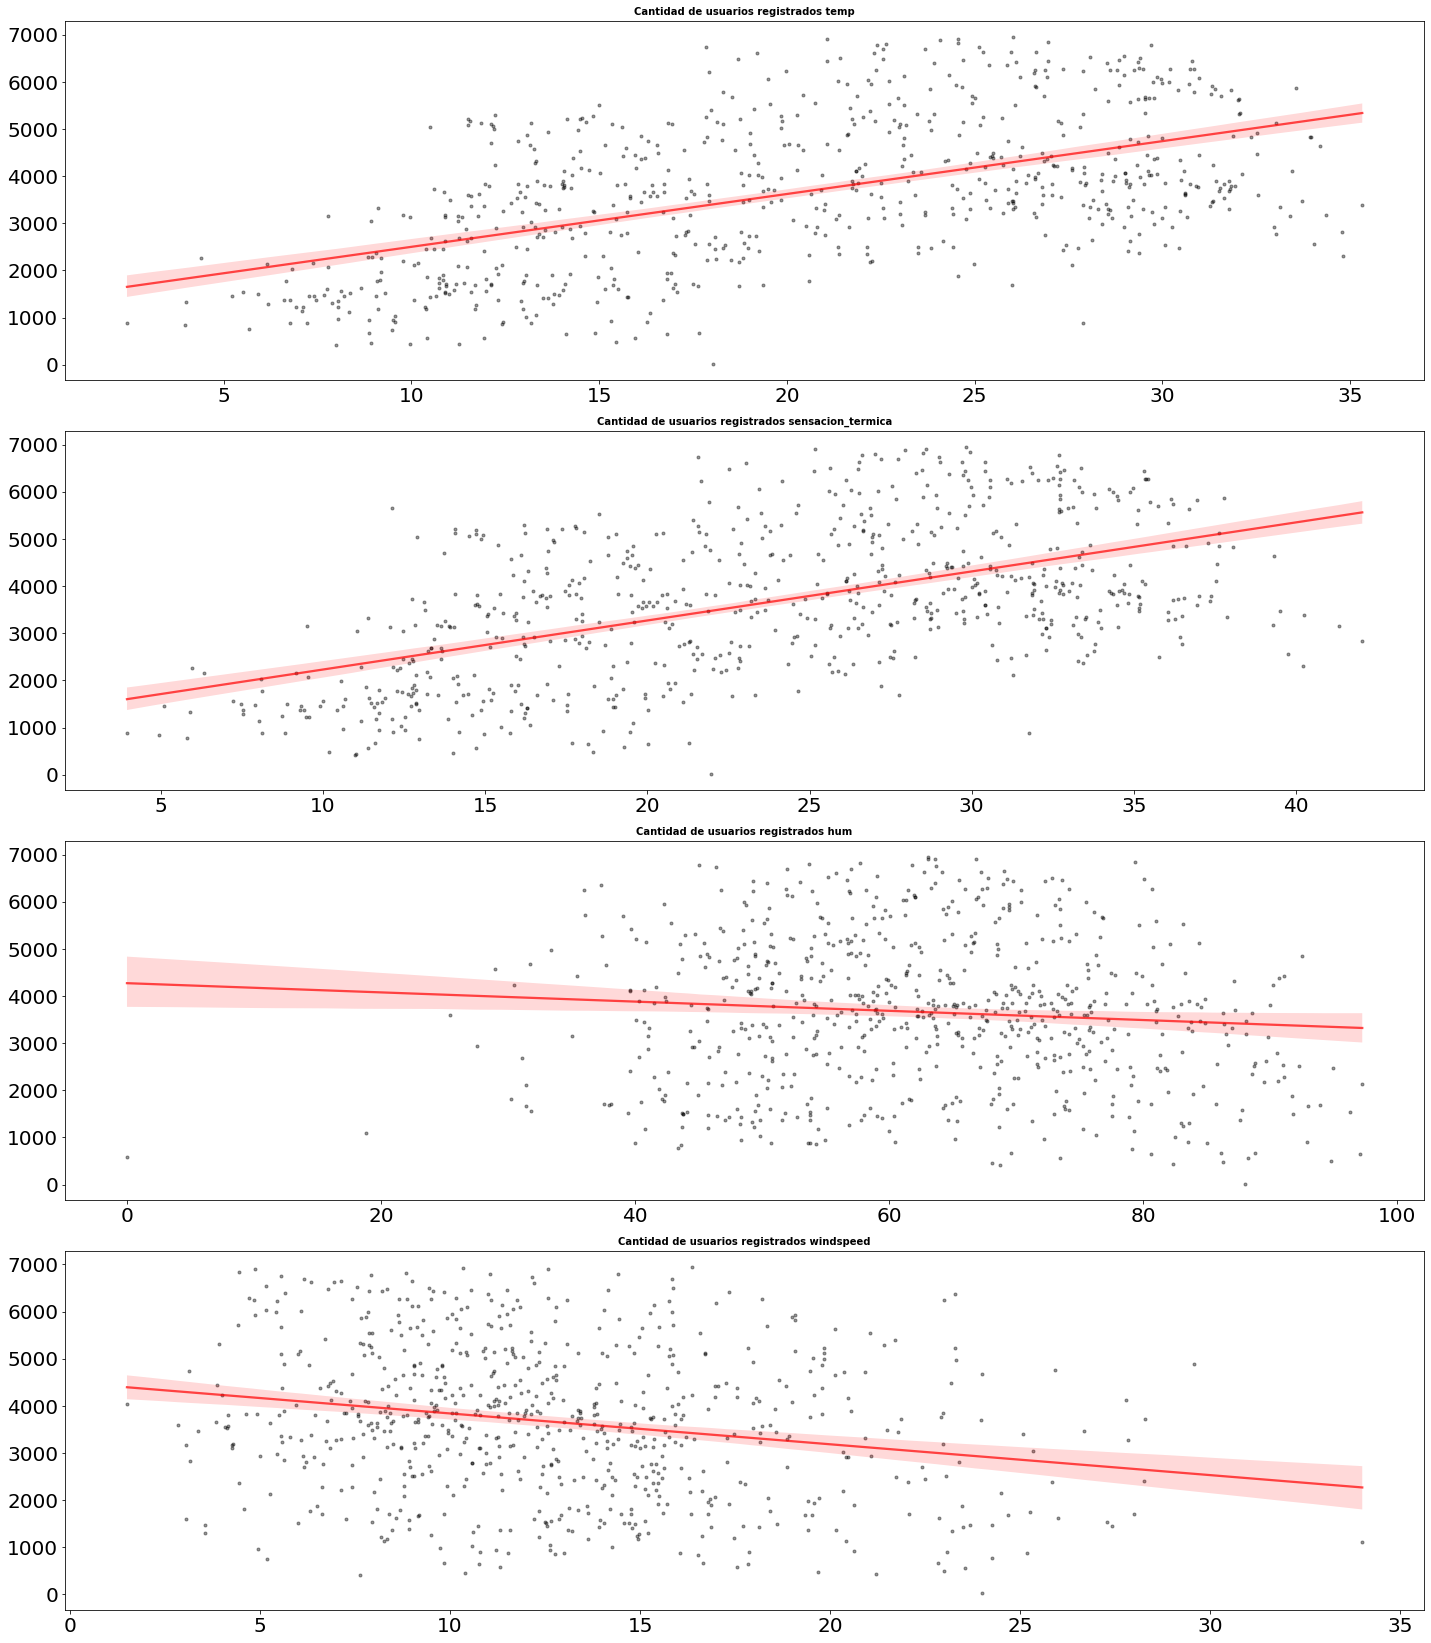

In [ ]:
# Gráfico de relación entre variables predictoras y la variable a predecir. 
# ==============================================================================


fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (20, 40))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("registered")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["registered"], 
        color = "black", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Cantidad de usuarios registrados {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[0]);